# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) = A^Tx^TAx - 2A^Tx^Ty + y^Ty = A^Tx^TAx - 2Axy^T + y^Ty$$
$$ D_f(x) = d(A^Tx^TAx) - 2d(Axy^T) + d(y^Ty) =  2A^Tx^TAdx - 2Ay^Tdx = 2(A^Tx^TA - Ay^T)dx = 2(A^T(Ax - y))^Tdx $$
$$ D_f(x) = \langle \nabla f(x), dx \rangle = 2 \langle A^T (Ax - y), dx \rangle  $$
$$ \nabla f(x) = 2A^T(Ax-y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax-y)  = 0$$
$$ 2A^TAx - 2A^Ty = 0 $$
$$ 2A^TAx = 2A^Ty $$
$$ x =  (A^TA)^{-1}A^Ty$$ 

### 2.1 Реализация прямого решения

In [13]:
import numpy as np
import matplotlib.pyplot as plt

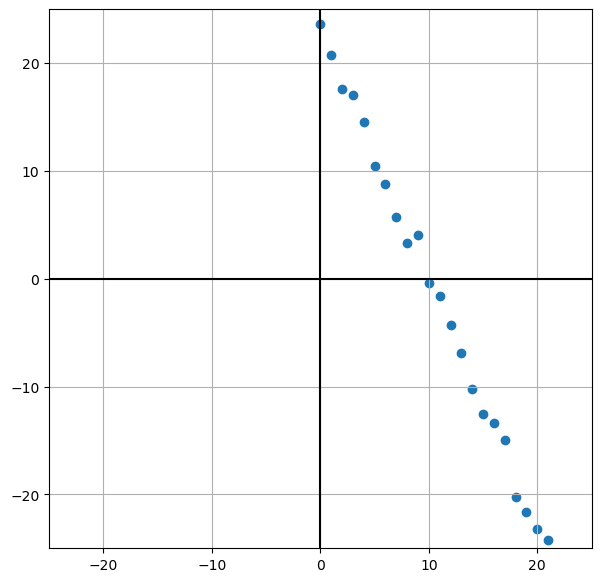

In [14]:

#y = ax + b, ниже происходит генерация коэффициентов
a_orig = (-1)**23 * 0.1 * 23 # по формуле (-1)^n * 0.1 * n
b_orig = 23*(-1)**(23+1) # по формуле n*(-1)^(n+1)
random_state = 23 # х

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [15]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([ 23.66698806,  20.72581308,  17.62238059,  17.04863382,
         14.50167179,  10.44891844,   8.83245188,   5.76254031,
          3.27785248,   4.07225828,  -0.34745899,  -1.62985984,
         -4.27772848,  -6.83965707, -10.24345   , -12.50994188,
        -13.35826363, -14.97112315, -20.23806777, -21.63876863,
        -23.20184052, -24.25462872, -27.06183803, -29.08788133,
        -31.9588937 ]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?
Ответ <br>
Добавление данного столбца к матрице А позволяет учитывать свободный член $b$ в модели линейной регрессии

$$y = b + w_1x_1 + w_2x_2 + ... + w_n x_n$$

Это позволяет записать уравнение в виде:

$$y = A\vec{x}, \quad A = \begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_n & 1 \end{bmatrix}, \quad \vec{x} = \begin{bmatrix} a \\ b \end{bmatrix}$$

Добавление этого столбца позволяет линии пересекать ось $y$ в произвольной точке, что расширяет пространство возможных решений. Без данного столбца все линии будут проходить через точку (0,0)

In [16]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат

a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
a, b = a_b_analytical
print("a =", a_b_analytical[0])
print("b =", a_b_analytical[1])


a = -2.2920453508001577
b = 22.878148489301406


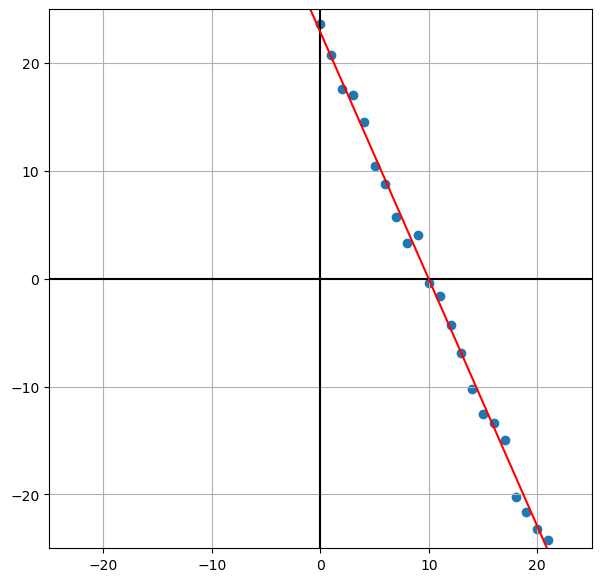

In [17]:
# постройте линию которая вышла рядом с изначальными данными
y1 = a * (-25) + b
y2 = a * 25 + b

# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
ax.plot([-25, 25], [y1, y2], color='red')

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

Шаг 1: a = -1.7470, b = -0.0463, grad = [8735.15534426  231.31978602]


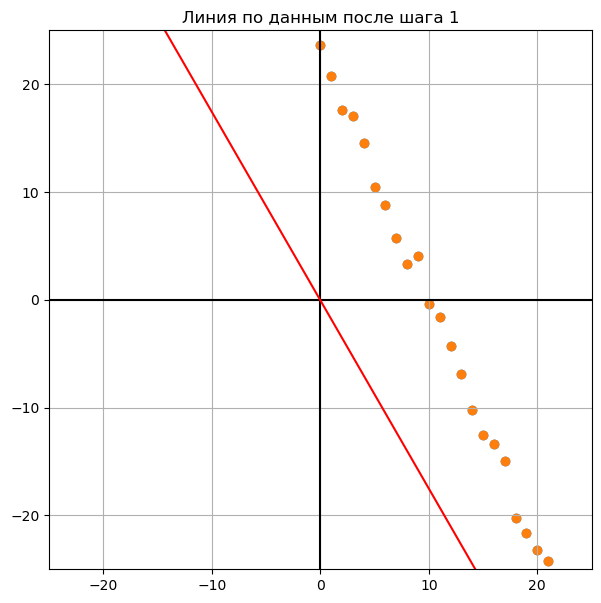

Шаг 2: a = -0.0643, b = 0.1176, grad = [-8413.50750481  -819.21205316]


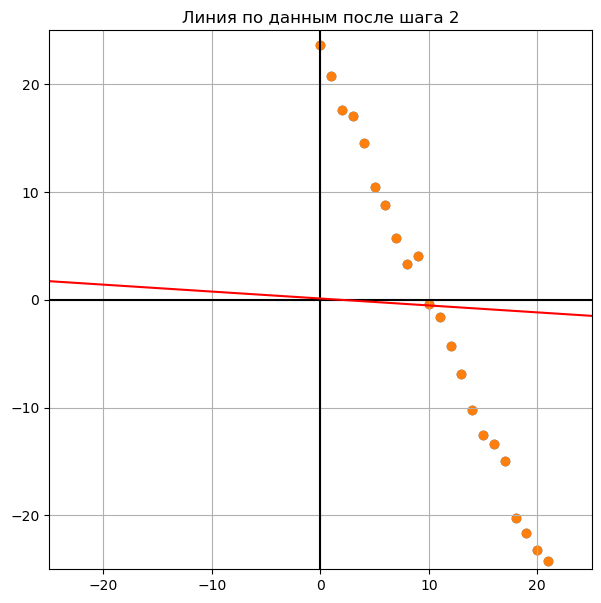

Шаг 3: a = -1.6994, b = 0.0779, grad = [8175.272651    198.60096795]


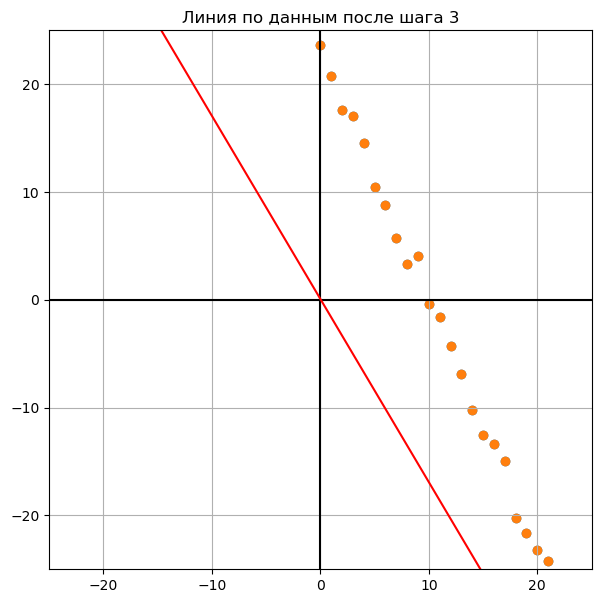

Шаг 4: a = -0.1250, b = 0.2347, grad = [-7872.09386111  -784.41775985]


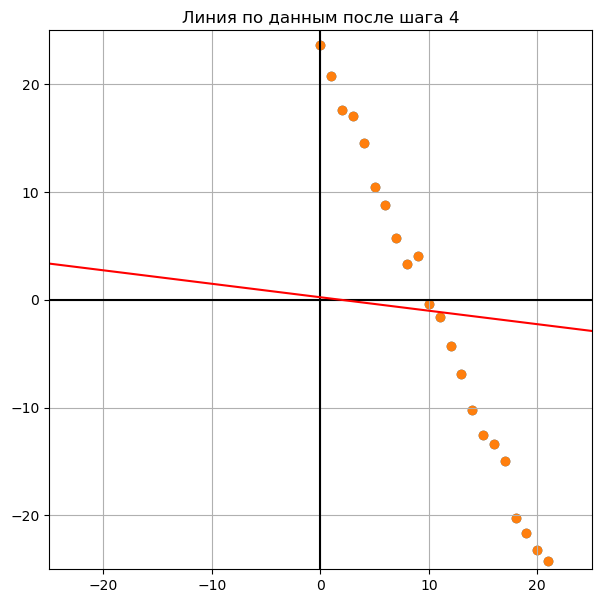

Шаг 5: a = -1.6552, b = 0.2011, grad = [7651.34023785  168.07768109]


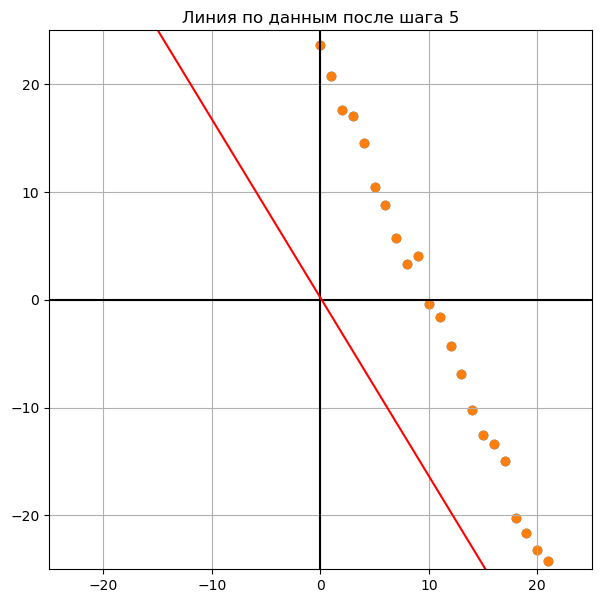

Шаг 6: a = -0.1821, b = 0.3515, grad = [-7365.45595007  -751.76392427]


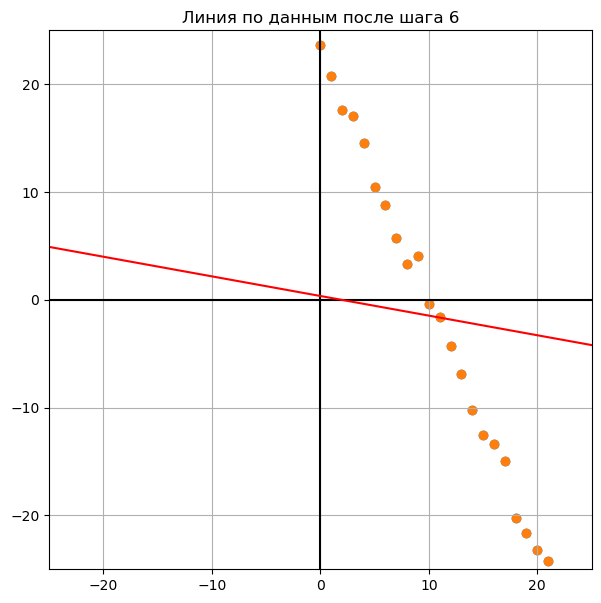

Шаг 101: a = -1.2469, b = 5.3229, norm(grad) = 392.7164
Шаг 201: a = -1.4673, b = 9.4065, norm(grad) = 179.2085
Шаг 301: a = -1.6582, b = 12.5392, norm(grad) = 137.2560
Шаг 401: a = -1.8056, b = 14.9434, norm(grad) = 105.3386
Шаг 501: a = -1.9187, b = 16.7885, norm(grad) = 80.8435
Шаг 601: a = -2.0055, b = 18.2046, norm(grad) = 62.0445
Шаг 701: a = -2.0721, b = 19.2914, norm(grad) = 47.6169
Шаг 801: a = -2.1233, b = 20.1254, norm(grad) = 36.5442
Шаг 901: a = -2.1625, b = 20.7655, norm(grad) = 28.0464
Шаг 1001: a = -2.1926, b = 21.2568, norm(grad) = 21.5246
Шаг 1101: a = -2.2158, b = 21.6338, norm(grad) = 16.5193
Шаг 1201: a = -2.2335, b = 21.9232, norm(grad) = 12.6780
Шаг 1296: a = -2.2465, b = 22.1355, grad = [ 0.60332631 -9.84104078]


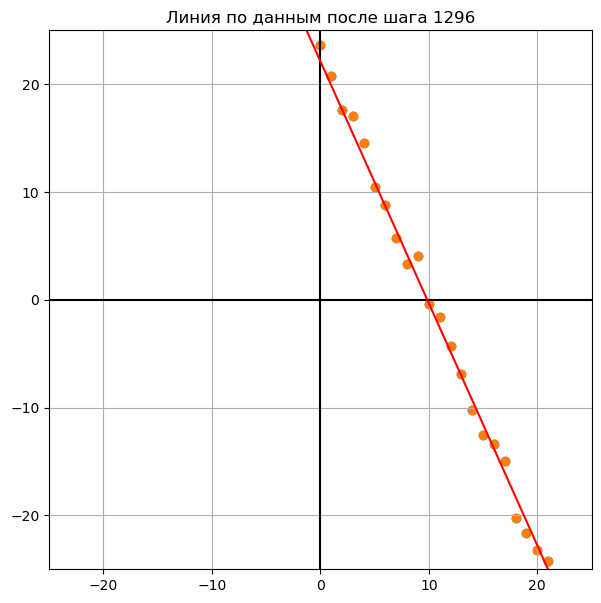

Шаг 1297: a = -2.2466, b = 22.1374, grad = [ 0.60173164 -9.81502953]


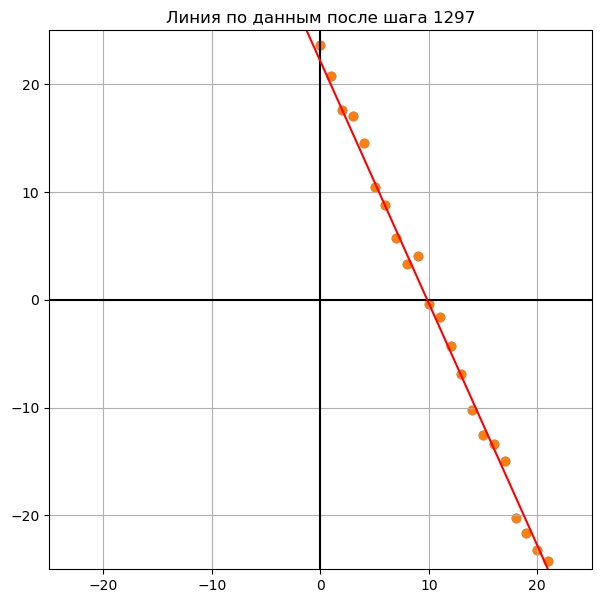

Шаг 1298: a = -2.2468, b = 22.1394, grad = [ 0.60014117 -9.78908703]


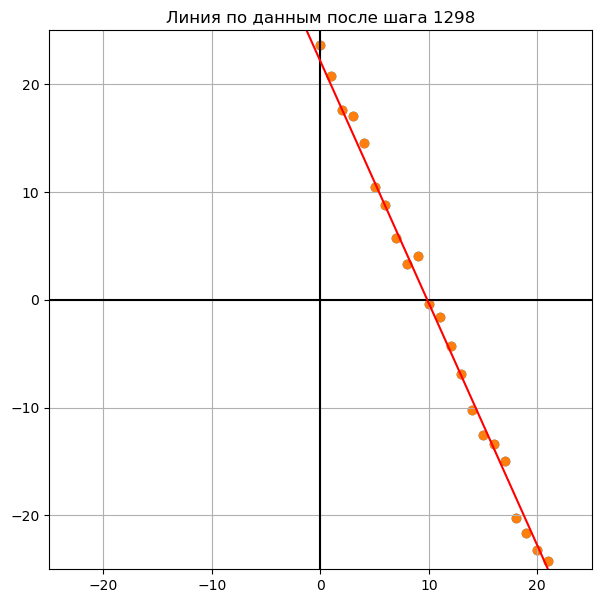

Шаг 1299: a = -2.2469, b = 22.1413, grad = [ 0.59855492 -9.7632131 ]


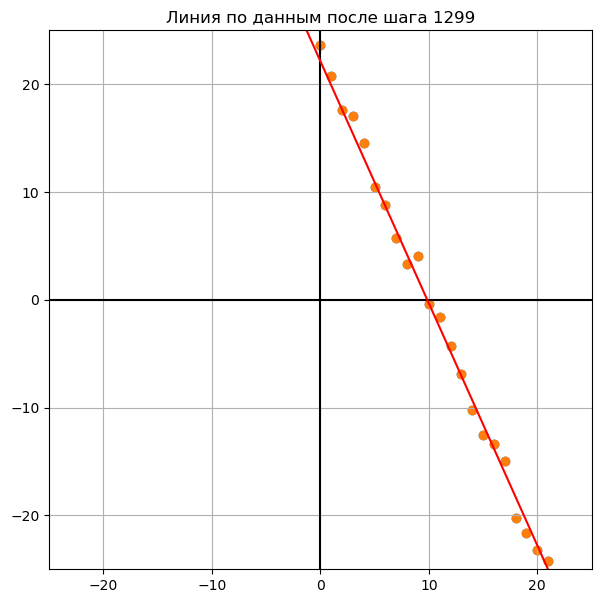

Шаг 1300: a = -2.2470, b = 22.1433, grad = [ 0.59697285 -9.73740756]


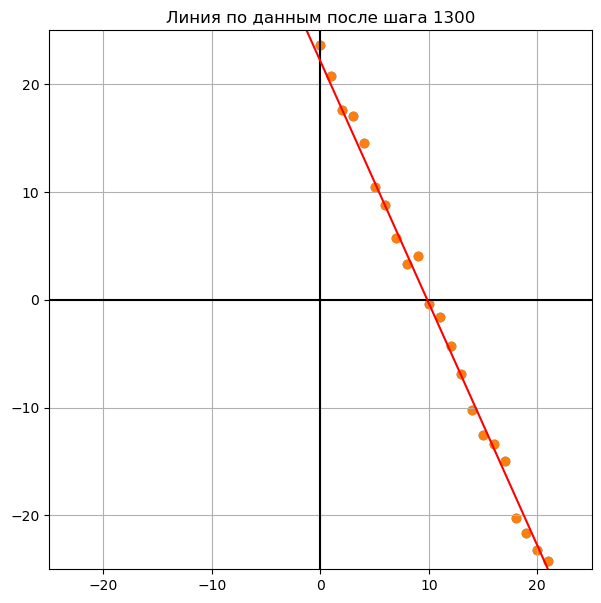

In [12]:
alpha = 0.0002
a_b_analytical = np.array([0.0, 0.0])

for i in range(1300):
    grad = 2 * A.T @ (A @ a_b_analytical - y)
    a_b_analytical -= alpha * grad
    
    a = a_b_analytical[0]
    b = a_b_analytical[1]
    
    if i < 6 or i >= 1295:
        y1 = a * (-25) + b
        y2 = a * 25 + b
        
        f, ax = plt.subplots(figsize=(7, 7))
        ax.scatter(A[:, 0], y)
        plt.scatter(A[:, 0], y)
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.axvline(0, color='black')
        ax.axhline(0, color='black')
        ax.grid(True)
        
        ax.plot([-25, 25], [y1, y2], color = "red")
        ax.set_title(f'Линия по данным после шага {i+1}')
        print(f"Шаг {i+1}: a = {a:.4f}, b = {b:.4f}, grad = {grad}")
        plt.show()
   
    elif i % 100 == 0:
        print(f"Шаг {i+1}: a = {a:.4f}, b = {b:.4f}, norm(grad) = {np.linalg.norm(grad):.4f}")